# **Create a neural network model to detect breast cancer using the Wisconsin Diagnostic Breast Cancer (WDBC) dataset**

In [17]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = load_breast_cancer()

In [19]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [20]:
## check for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [21]:
x = data.data
y = data.target

In [22]:
## train-test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
x_train.shape

(381, 30)

In [25]:
## apply ANN methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, ELU, PReLU

**Model 01**

In [26]:
model = Sequential()
model.add(Dense(units = 64,activation='relu',input_shape=(x_train.shape[1],))) ## input layer
model.add(Dense(units = 32,activation='relu')) ## hidden layer 1
model.add(Dense(units = 16,activation='relu')) ## hidden layer 2
model.add(Dense(units = 1,activation='sigmoid')) ## output layer

In [27]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [28]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
import keras
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [30]:
model_history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=early_stopping)

Epoch 1/1000
10/10 [==============================] - 3s 40ms/step - loss: 0.5663 - accuracy: 0.7993 - val_loss: 0.4731 - val_accuracy: 0.9221
Epoch 2/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.4191 - accuracy: 0.9605 - val_loss: 0.3605 - val_accuracy: 0.9351
Epoch 3/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.3046 - accuracy: 0.9605 - val_loss: 0.2680 - val_accuracy: 0.9481
Epoch 4/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.2150 - accuracy: 0.9605 - val_loss: 0.1998 - val_accuracy: 0.9610
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1566 - accuracy: 0.9638 - val_loss: 0.1549 - val_accuracy: 0.9740
Epoch 6/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1231 - accuracy: 0.9638 - val_loss: 0.1270 - val_accuracy: 0.9740
Epoch 7/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1043 - accuracy: 0.9704 - val_loss: 0.1116 - val_accuracy: 0.9740

In [31]:
## evaluate model

y_pred = (model.predict(x_test)>0.5).astype('int32')

6/6 [==============================] - 0s 3ms/step


In [35]:
## calculate accuracy

from sklearn.metrics import accuracy_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

print(f"Accuracy:{accuracy}")
print(f"Sensitivity:{sensitivity}")

Accuracy:0.9680851063829787
Sensitivity:0.9669421487603306


In [37]:
## confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 65,   2],
       [  4, 117]])

**Model 02**

In [38]:
# Build another neural network with different parameters
from tensorflow.keras.layers import Dense, Dropout

model2 = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a different batch size and more epochs
history = model2.fit(x_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculate accuracy and sensitivity
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")


Epoch 1/200
19/19 [==============================] - 4s 14ms/step - loss: 0.5327 - accuracy: 0.7895 - val_loss: 0.4052 - val_accuracy: 0.9221
Epoch 2/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.9408 - val_loss: 0.2747 - val_accuracy: 0.9351
Epoch 3/200
19/19 [==============================] - 0s 5ms/step - loss: 0.2563 - accuracy: 0.9309 - val_loss: 0.1932 - val_accuracy: 0.9610
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 0.1900 - accuracy: 0.9507 - val_loss: 0.1471 - val_accuracy: 0.9870
Epoch 5/200
19/19 [==============================] - 0s 5ms/step - loss: 0.1525 - accuracy: 0.9474 - val_loss: 0.1161 - val_accuracy: 0.9870
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 0.1393 - accuracy: 0.9507 - val_loss: 0.0943 - val_accuracy: 0.9870
Epoch 7/200
19/19 [==============================] - 0s 5ms/step - loss: 0.1078 - accuracy: 0.9704 - val_loss: 0.0824 - val_accuracy: 0.9870
Epoch 8/200


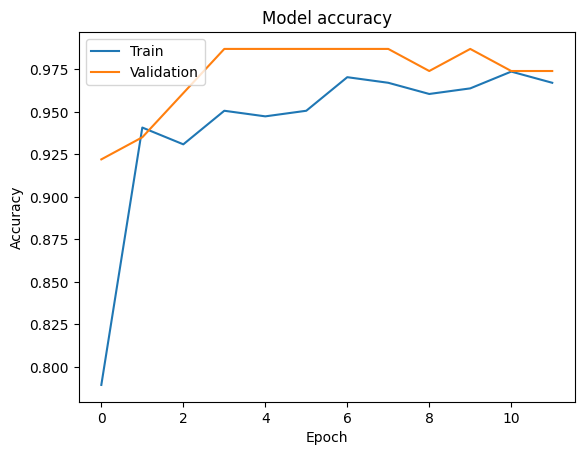

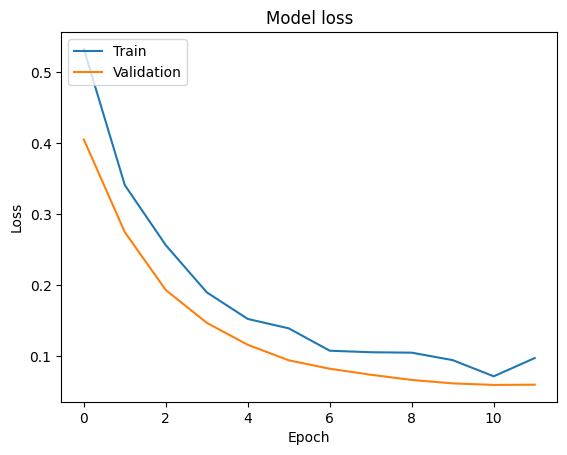

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
